Find the first derivative of your speech signal with finite difference method. Listen to the first derivative signal and the original speech signal.

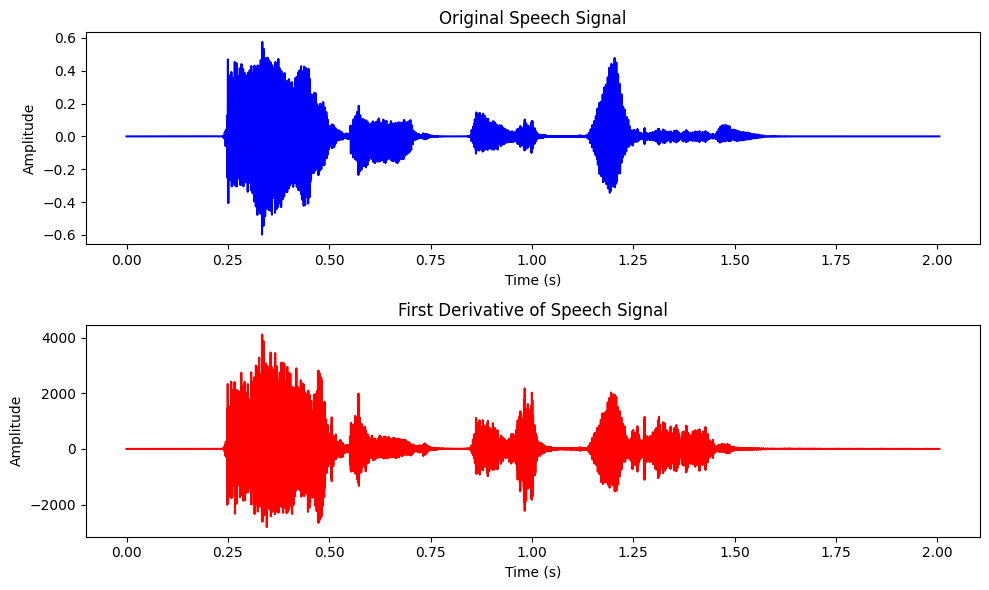

Playing Original Speech Signal...


ValueError: No output device matching 'pulseaudio'

In [16]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

# Set the audio backend to "pulseaudio"
sd.default.device = 'pulseaudio'

# Load the speech signal
file_path = "SP.wav"  # Change this to your speech file path
signal, sr = librosa.load(file_path, sr=None)

# Compute the time step
time_step = 1 / sr

# Compute the first derivative using finite difference method
derivative = np.gradient(signal, time_step)

# Plot the original and derivative signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(np.arange(len(signal)) * time_step, signal, color='b')
plt.title('Original Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(derivative)) * time_step, derivative, color='r')
plt.title('First Derivative of Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Play the original speech signal using the default output device
print("Playing Original Speech Signal...")
sd.play(signal, sr)
sd.wait()

# Play the first derivative of the speech signal using the default output device
print("Playing First Derivative of Speech Signal...")
sd.play(derivative, sr)
sd.wait()


 Detect the points of zero crossing in the first derivative signal. Compare the average length between two consecutive zero crossings for speech and silence regions. Observe the pattern.

In [17]:
import numpy as np

# Assume 'derivative' is the first derivative signal

# Step 1: Determine a threshold value
threshold = 0.1  # Adjust as needed based on the characteristics of your derivative signal

# Step 2: Detect zero crossing points
zero_crossings = np.where(np.diff(np.sign(derivative)))[0]

# Step 3: Differentiate between speech and silence regions
speech_regions = []
silence_regions = []
current_region = []

for crossing_index in zero_crossings:
    if abs(derivative[crossing_index]) < threshold:
        # Silence region
        if current_region:
            silence_regions.append(current_region)
            current_region = []
    else:
        # Speech region
        current_region.append(crossing_index)

# Handle the last region
if current_region:
    silence_regions.append(current_region)

# Step 4: Calculate average length between two consecutive zero crossings
def calculate_average_length(regions):
    if regions:
        lengths = [len(region) for region in regions]
        return sum(lengths) / len(lengths)
    else:
        return 0

average_length_speech = calculate_average_length(silence_regions)
average_length_silence = calculate_average_length(speech_regions)

# Step 5: Compare average lengths
print("Average length between two consecutive zero crossings for speech regions:", average_length_speech)
print("Average length between two consecutive zero crossings for silence regions:", average_length_silence)


Average length between two consecutive zero crossings for speech regions: 9.175078864353312
Average length between two consecutive zero crossings for silence regions: 0


Speak 5 of your favoritewords. Observe the length of the speech signals. Compare the lengths of your spoken words with those of your projectteam-mate.

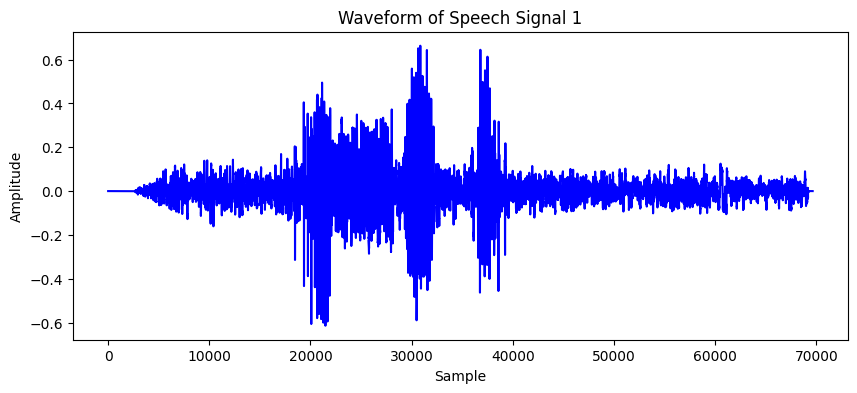

Sampling rate of Speech Signal 1: 48000 Hz


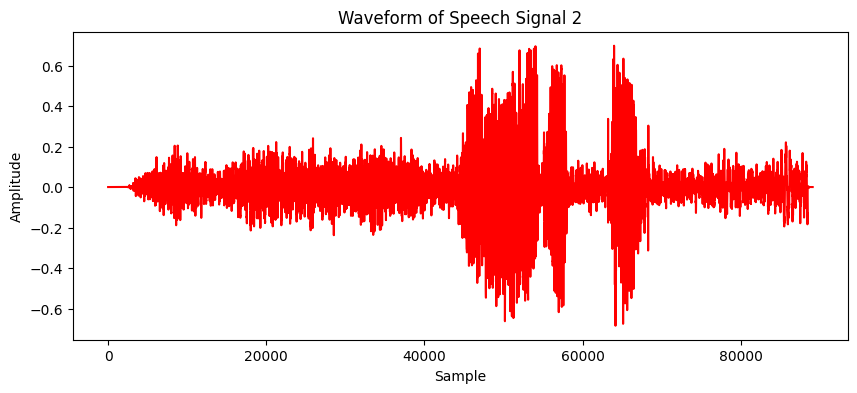

Sampling rate of Speech Signal 2: 48000 Hz


In [20]:
import librosa
import matplotlib.pyplot as plt

# Load the first speech signal
file_path_1 = "Amrita.wav"  # Replace with the path to your first speech signal
signal_1, sr_1 = librosa.load(file_path_1, sr=None)

# Plot the waveform of the first speech signal
plt.figure(figsize=(10, 4))
plt.plot(signal_1, color='b')
plt.title('Waveform of Speech Signal 1')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# Print the sampling rate of the first speech signal
print("Sampling rate of Speech Signal 1:", sr_1, "Hz")

# Load the second speech signal
file_path_2 = "Amrita2.wav"  # Replace with the path to your second speech signal
signal_2, sr_2 = librosa.load(file_path_2, sr=None)

# Plot the waveform of the second speech signal
plt.figure(figsize=(10, 4))
plt.plot(signal_2, color='r')
plt.title('Waveform of Speech Signal 2')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# Print the sampling rate of the second speech signal
print("Sampling rate of Speech Signal 2:", sr_2, "Hz")


Select a sentence which can be used for making a statement or asking a question. Ex: “You are going to college on Sunday(./?)”. Record two signals –one with making the statement while other with asking question. Study the two signals and compare them.


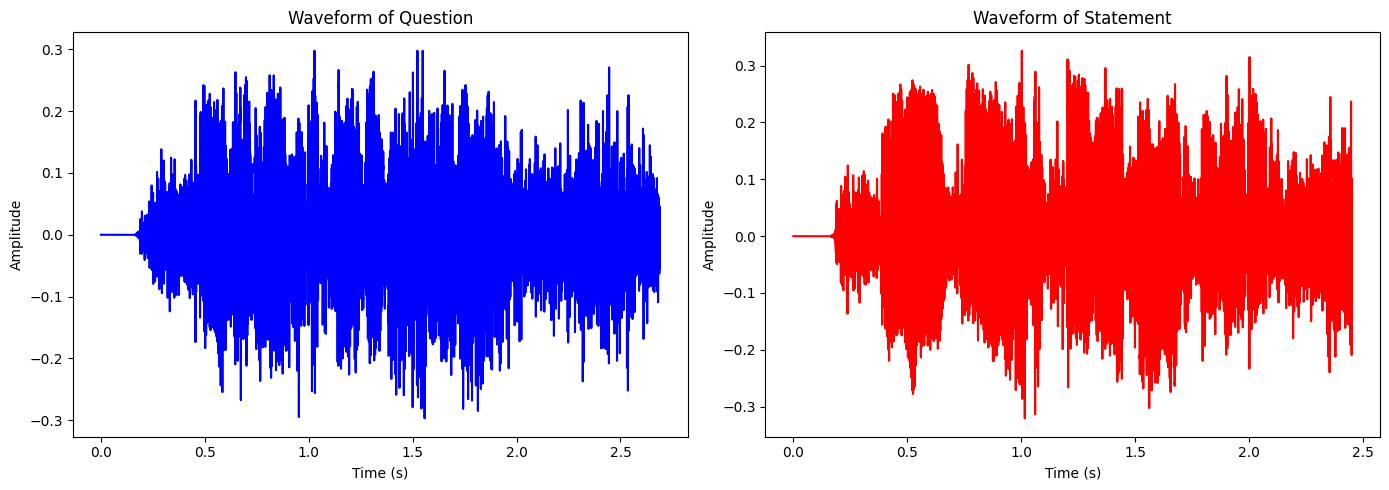

Pitch analysis results:
Question average pitch: 10.97 Hz
Statement average pitch: 9.78 Hz


In [22]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def get_pitch(audio_file_path):
    # Loading the audio file
    y, sr = librosa.load(audio_file_path)

    # Compute the pitch using Harmonic-Percussive Source Separation
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

    # Average pitch across time frames
    avg_pitch = np.mean(pitches)

    return avg_pitch, y, sr

# Replace with actual file paths
question_pitch, question_waveform, question_sr = get_pitch('Qstn.wav')
statement_pitch, statement_waveform, statement_sr = get_pitch('sentence.wav')

# Plot waveforms of the two signals
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(np.arange(len(question_waveform)) / question_sr, question_waveform, color='b')
plt.title('Waveform of Question')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.plot(np.arange(len(statement_waveform)) / statement_sr, statement_waveform, color='r')
plt.title('Waveform of Statement')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Compare pitch characteristics
print("Pitch analysis results:")
print(f"Question average pitch: {question_pitch:.2f} Hz")
print(f"Statement average pitch: {statement_pitch:.2f} Hz")
